# stock market prediction

In [3]:
    #DataFlair - Make necessary imports
    import quandl
    import numpy as np 
    from sklearn.linear_model import LinearRegression
    from sklearn.svm import SVR
    from sklearn.model_selection import train_test_split

In [4]:
    #DataFlair - Get Amazon stock data
    amazon = quandl.get("WIKI/AMZN")
    print(amazon.head())

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.437500   1.

In [5]:
    #DataFlair - Get only the data for the Adjusted Close column
    amazon = amazon[['Adj. Close']]
    print(amazon.head())

            Adj. Close
Date                  
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635833
1997-05-21    1.427500
1997-05-22    1.395833


In [15]:
    #DataFlair - Predict for 30 days; Predicted has the data of Adj. Close shifted up by 30 rows
    forecast_len=30
    amazon['Predicted'] = amazon[['Adj. Close']].shift(-forecast_len)
    print(amazon.tail())

            Adj. Close  Predicted
Date                             
2018-03-21     1581.86        NaN
2018-03-22     1544.10        NaN
2018-03-23     1495.56        NaN
2018-03-26     1555.86        NaN
2018-03-27     1497.05        NaN


In [16]:
    #DataFlair - Drop the Predicted column, turn it into a NumPy array to create dataset
    x=np.array(amazon.drop(['Predicted'],1))
    #DataFlair - Remove last 30 rows
    x=x[:-forecast_len]
    print(x)

[[  1.72916667]
 [  1.70833333]
 [  1.63583333]
 ...
 [795.9       ]
 [799.02      ]
 [813.64      ]]


In [17]:
    #DataFlair - Create dependent dataset for predicted values, remove the last 30 rows
    y=np.array(amazon['Predicted'])
    y=y[:-forecast_len]
    print(y)

[  20.93333333   19.81666667   17.96666667 ... 1495.56       1555.86
 1497.05      ]


In [18]:
    #DataFlair - Split datasets into training and test sets (80% and 20%)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
    #DataFlair - Create SVR model and train it
    svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1) 
    svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
    #DataFlair - Get score
    svr_rbf_confidence=svr_rbf.score(x_test,y_test)
    print(f"SVR Confidence: {round(svr_rbf_confidence*100,5)}%")

SVR Confidence: 94.26542%


In [21]:
    #DataFlair - Create Linear Regression model and train it
    lr=LinearRegression()
    lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
    #DataFlair - Get score for Linear Regression
    lr_confidence=lr.score(x_test,y_test)
    print(f"Linear Regression Confidence: {round(lr_confidence*100,2)}%")

Linear Regression Confidence: 93.65%


In [29]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate

amazon = quandl.get("WIKI/AMZN")
print(amazon.tail())

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1586.45  1590.00  1563.17  1581.86  4667291.0          0.0   
2018-03-22  1565.47  1573.85  1542.40  1544.10  6177737.0          0.0   
2018-03-23  1539.01  1549.02  1495.36  1495.56  7843966.0          0.0   
2018-03-26  1530.00  1556.99  1499.25  1555.86  5547618.0          0.0   
2018-03-27  1572.40  1575.96  1482.32  1497.05  6793279.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1586.45    1590.00   1563.17     1581.86   
2018-03-22          1.0    1565.47    1573.85   1542.40     1544.10   
2018-03-23          1.0    1539.01    1549.02   1495.36     1495.56   
2018-03-26          1.0    1530.00    1556.99   1499.25     1555.86   
2018-03-27          1.0    1572.40    1575.96   1482.32

In [49]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split


amazon = quandl.get("WIKI/AMZN")
print(amazon.tail())
amazon = amazon[['Adj. Close']]
forecast_out = int(30)             # predicting 30 days into future
amazon['Prediction'] = amazon[['Adj. Close']].shift(-forecast_out) 
print("""#####       print Data    ######""")
print(df.head())

X = np.array(amazon.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

y = np.array(amazon['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("""       #########       Confidence     #########      """)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(""" ***********Fore cast  Prediction      ***********""")
print(forecast_prediction)

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1586.45  1590.00  1563.17  1581.86  4667291.0          0.0   
2018-03-22  1565.47  1573.85  1542.40  1544.10  6177737.0          0.0   
2018-03-23  1539.01  1549.02  1495.36  1495.56  7843966.0          0.0   
2018-03-26  1530.00  1556.99  1499.25  1555.86  5547618.0          0.0   
2018-03-27  1572.40  1575.96  1482.32  1497.05  6793279.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1586.45    1590.00   1563.17     1581.86   
2018-03-22          1.0    1565.47    1573.85   1542.40     1544.10   
2018-03-23          1.0    1539.01    1549.02   1495.36     1495.56   
2018-03-26          1.0    1530.00    1556.99   1499.25     1555.86   
2018-03-27          1.0    1572.40    1575.96   1482.32

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1586.45  1590.00  1563.17  1581.86  4667291.0          0.0   
2018-03-22  1565.47  1573.85  1542.40  1544.10  6177737.0          0.0   
2018-03-23  1539.01  1549.02  1495.36  1495.56  7843966.0          0.0   
2018-03-26  1530.00  1556.99  1499.25  1555.86  5547618.0          0.0   
2018-03-27  1572.40  1575.96  1482.32  1497.05  6793279.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1586.45    1590.00   1563.17     1581.86   
2018-03-22          1.0    1565.47    1573.85   1542.40     1544.10   
2018-03-23          1.0    1539.01    1549.02   1495.36     1495.56   
2018-03-26          1.0    1530.00    1556.99   1499.25     1555.86   
2018-03-27          1.0    1572.40    1575.96   1482.32

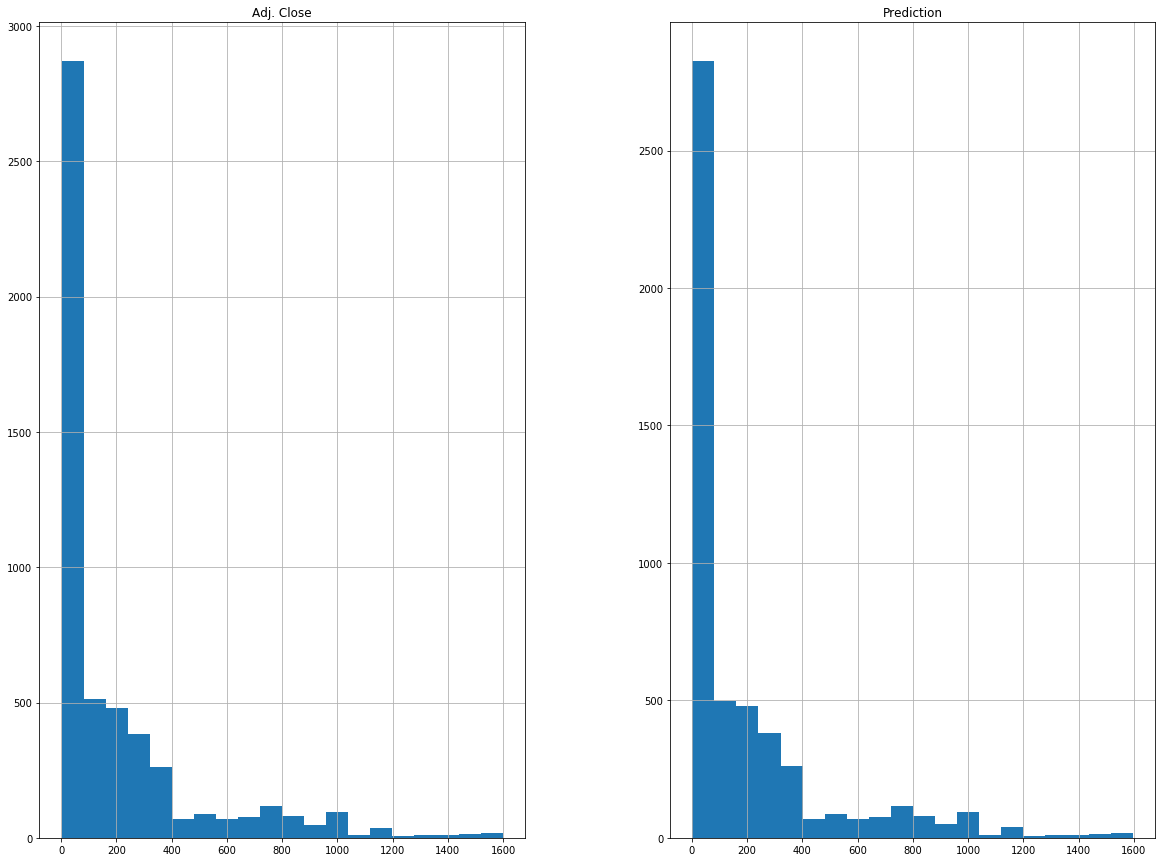

In [52]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split


amazon = quandl.get("WIKI/AMZN")
print(amazon.tail())
amazon = amazon[['Adj. Close']]
forecast_out = int(60)             # predicting 60 days into future
amazon['Prediction'] = amazon[['Adj. Close']].shift(-forecast_out) 
print("""#####      Print Data    ######""")
print(df.head())

X = np.array(amazon.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

y = np.array(amazon['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("""       #########       Confidence     #########      """)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(""" ***********Fore cast  Prediction      ***********""")
print(forecast_prediction)
%matplotlib inline
import matplotlib.pyplot as plt
amazon.hist(bins=20,figsize=(20,15))
plt.show()